In [6]:
!pip install pandas openpyxl matplotlib scikit-learn joblib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [8]:
df = pd.read_excel("./data/Online Retail.xlsx") 

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
columns_to_check = ['Quantity', 'UnitPrice']

max_values = df[columns_to_check].max()
min_values = df[columns_to_check].min()

print("Maximum values:")
print(max_values)

print("\nMinimum values:")
print(min_values)

Maximum values:
Quantity     80995.0
UnitPrice    38970.0
dtype: float64

Minimum values:
Quantity    -80995.00
UnitPrice   -11062.06
dtype: float64


In [14]:
df= df[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)]

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\Ayush\AppData\Local\Temp\ipykernel_3048\3633860036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [16]:
invalid_dates = df[pd.isna(df['InvoiceDate'])]
print("\nInvalid dates in 'InvoiceDate' column:")
print(invalid_dates)


Invalid dates in 'InvoiceDate' column:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [17]:
df['hour'] = df['InvoiceDate'].dt.hour

df['weekday'] = df['InvoiceDate'].dt.weekday

df['month'] = df['InvoiceDate'].dt.month

df['week'] = df['InvoiceDate'].dt.isocalendar().week

C:\Users\Ayush\AppData\Local\Temp\ipykernel_3048\4105169093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['InvoiceDate'].dt.hour
C:\Users\Ayush\AppData\Local\Temp\ipykernel_3048\4105169093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['InvoiceDate'].dt.weekday
C:\Users\Ayush\AppData\Local\Temp\ipykernel_3048\4105169093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

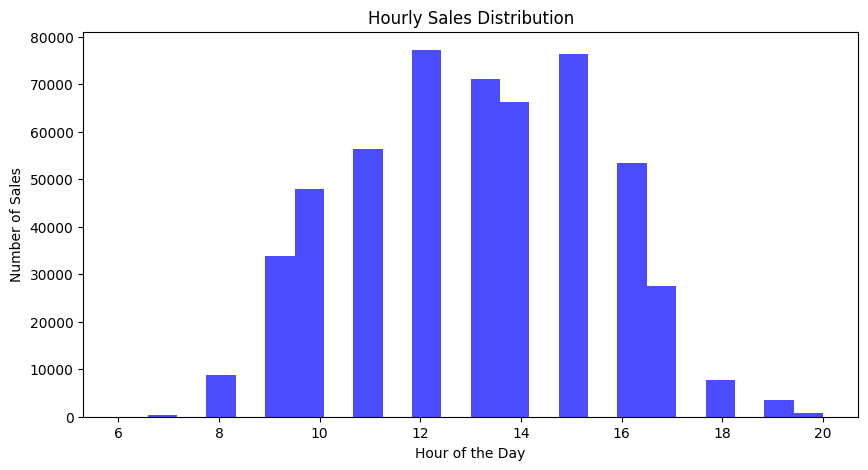

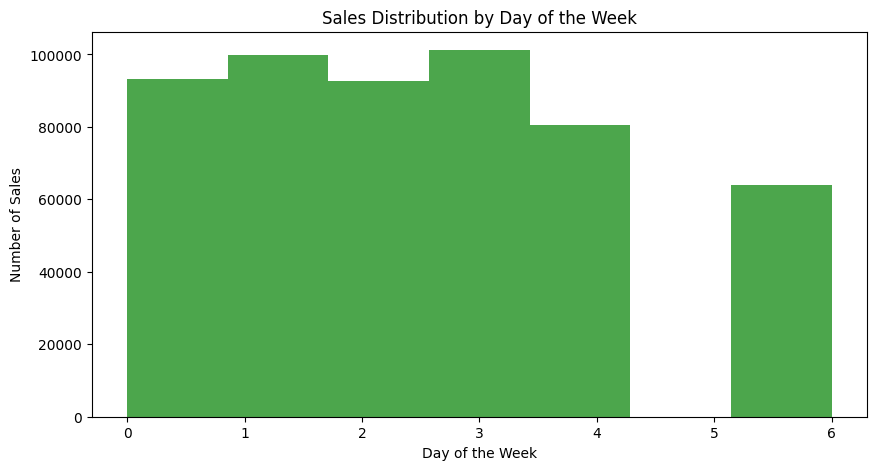

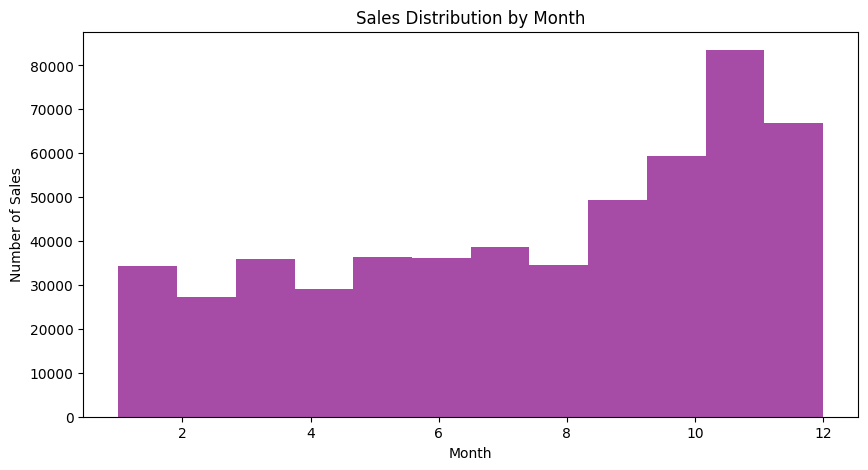

In [18]:
# Plotting Hourly Sales
plt.figure(figsize=(10, 5))
plt.hist(df['hour'], bins=24, alpha=0.7, color='blue')
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.show()

# Plotting Weekly Sales
plt.figure(figsize=(10, 5))
plt.hist(df['weekday'], bins=7, alpha=0.7, color='green')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.show()

# Plotting Monthly Sales
plt.figure(figsize=(10, 5))
plt.hist(df['month'], bins=12, alpha=0.7, color='purple')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


In [19]:
df['total_sales'] = df['UnitPrice'] * df['Quantity']


C:\Users\Ayush\AppData\Local\Temp\ipykernel_3048\494720902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df['UnitPrice'] * df['Quantity']


In [20]:
def calculate_peak_periods(data, group_by_column, top_n_percent=20):
    period_sales = data.groupby(group_by_column)['total_sales'].sum().reset_index()
    period_sales_sorted = period_sales.sort_values(by='total_sales', ascending=False)
    num_peak_periods = int((top_n_percent / 100) * len(period_sales_sorted))
    peak_periods = period_sales_sorted.head(num_peak_periods)[group_by_column].tolist()
    return peak_periods

In [21]:

peak_months = calculate_peak_periods(df, 'month')
peak_weeks = calculate_peak_periods(df, 'week')
peak_weekdays = calculate_peak_periods(df, 'weekday')
peak_hours = calculate_peak_periods(df, 'hour')

In [22]:
def assign_peak_level_combined(row):
    peak_count = sum([
        row['month'] in peak_months,
        row['week'] in peak_weeks,
        row['weekday'] in peak_weekdays,
        row['hour'] in peak_hours
    ])
    return ['Very Low', 'Low', 'Medium', 'High', 'Very High'][peak_count]


In [23]:
df['peak_period_level'] = df.apply(assign_peak_level_combined, axis=1)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_3048\2305562443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['peak_period_level'] = df.apply(assign_peak_level_combined, axis=1)


In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,month,week,total_sales,peak_period_level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,12,48,15.30,Medium
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,12,48,22.00,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,12,49,10.20,High
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12,49,12.60,High
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High


In [25]:
product_demand = df.groupby('StockCode')['Quantity'].sum().reset_index()
product_demand.rename(columns={'Quantity': 'total_quantity'}, inplace=True)

In [26]:
high_demand_threshold = np.percentile(product_demand['total_quantity'], 80)  # Top 20% demand
low_demand_threshold = np.percentile(product_demand['total_quantity'], 20)  # Bottom 20% demand

In [27]:
def assign_demand_level(total_quantity):
    if total_quantity > high_demand_threshold:
        return 'High'
    elif total_quantity < low_demand_threshold:
        return 'Low'
    else:
        return 'Medium'

In [28]:
product_demand['overall_demand_level'] = product_demand['total_quantity'].apply(assign_demand_level)

In [29]:
df = df.merge(product_demand[['StockCode', 'overall_demand_level']], on='StockCode')

In [30]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,month,week,total_sales,peak_period_level,overall_demand_level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,12,48,15.30,Medium,High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,12,48,22.00,Medium,High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531278,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,12,49,10.20,High,Medium
531279,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12,49,12.60,High,High
531280,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,Medium
531281,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,Medium


In [31]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [32]:
reference_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'UnitPrice': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [33]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,1.04
1,12347.0,1,182,481.21
2,12348.0,74,31,178.71
3,12349.0,18,73,605.10
4,12350.0,309,17,65.30


In [34]:
rfm['RecencySegment'] = pd.qcut(rfm['Recency'], 4, labels=['High', 'Medium', 'Low', 'Very Low'])
rfm['FrequencySegment'] = pd.qcut(rfm['Frequency'], 4, labels=['Very Low', 'Low', 'Medium', 'High'])
rfm['MonetarySegment'] = pd.qcut(rfm['Monetary'], 4, labels=['Very Low', 'Low', 'Medium', 'High'])

In [35]:
df = df.merge(rfm[['CustomerID', 'RecencySegment','FrequencySegment','MonetarySegment']], on='CustomerID', how='left')

In [36]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,month,week,total_sales,peak_period_level,overall_demand_level,RecencySegment,FrequencySegment,MonetarySegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,12,48,15.30,Medium,High,Very Low,High,High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High,Very Low,High,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,12,48,22.00,Medium,High,Very Low,High,High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High,Very Low,High,High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High,Very Low,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531278,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,12,49,10.20,High,Medium,High,Medium,Medium
531279,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12,49,12.60,High,High,High,Medium,Medium
531280,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,Medium,High,Medium,Medium
531281,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,Medium,High,Medium,Medium


In [37]:
unique_countries = df['Country'].nunique()

print(f"Number of unique country: {unique_countries}")

Number of unique country: 38


In [38]:
all_countries_stats = df.groupby('Country').agg(
    total_sales=('total_sales', 'sum'),
    avg_unit_price=('UnitPrice', 'mean')
).reset_index()

In [39]:
all_countries_stats

,Country,total_sales,avg_unit_price
0,Australia,138521.310,3.048523
1,Austria,10198.680,4.256030
2,Bahrain,754.140,4.597778
3,Belgium,41196.340,3.630158
4,Brazil,1143.600,4.456250
5,Canada,3666.380,6.030331
6,Channel Islands,20450.440,4.531618
7,Cyprus,13590.380,5.710391
8,Czech Republic,826.740,3.130800
9,Denmark,18955.340,3.146184


In [40]:
countries_excluding_uk_stats = all_countries_stats[all_countries_stats['Country'] != 'United Kingdom']

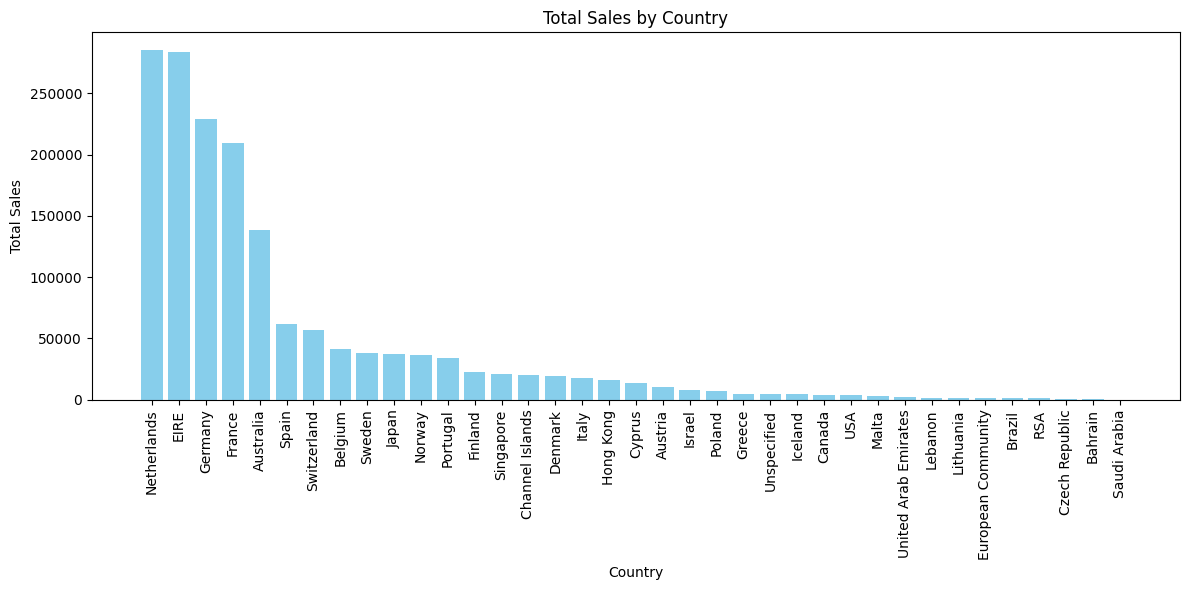

In [41]:
plt.figure(figsize=(12, 6))
country_stats_sorted = countries_excluding_uk_stats.sort_values('total_sales', ascending=False)
plt.bar(country_stats_sorted['Country'], country_stats_sorted['total_sales'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [42]:
high_demand_threshold_excluding_uk = np.percentile(countries_excluding_uk_stats['total_sales'], 80)  # Top 20% sales
low_demand_threshold_excluding_uk = np.percentile(countries_excluding_uk_stats['total_sales'], 20)  # Bottom 20% sales

In [43]:
high_demand_threshold_including_uk = np.percentile(all_countries_stats['total_sales'], 80)  # Top 20% sales
low_demand_threshold_including_uk = np.percentile(all_countries_stats['total_sales'], 20)  # Bottom 20% sales

In [44]:
low_demand_threshold_excluding_uk

np.float64(1735.5600000000002)

In [45]:
low_demand_threshold_including_uk

np.float64(1777.2400000000002)

In [46]:
high_demand_threshold_excluding_uk

np.float64(40632.738)

In [47]:
low_demand_threshold_excluding_uk

np.float64(1735.5600000000002)

In [48]:
def demand_level(country, total_sales):
    high_threshold, low_threshold = (
        (high_demand_threshold_including_uk, low_demand_threshold_including_uk)
        if country == 'United Kingdom'
        else (high_demand_threshold_excluding_uk, low_demand_threshold_excluding_uk)
    )
    return 'High' if total_sales > high_threshold else 'Low' if total_sales < low_threshold else 'Medium'


In [49]:
all_countries_stats['country_purchasing_power'] = all_countries_stats.apply(
    lambda x: demand_level(x['Country'], x['total_sales']), axis=1
)

In [50]:
df = df.merge(all_countries_stats[['Country', 'country_purchasing_power']], on='Country', how='left')

In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,month,week,total_sales,peak_period_level,overall_demand_level,RecencySegment,FrequencySegment,MonetarySegment,country_purchasing_power
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,12,48,15.30,Medium,High,Very Low,High,High,High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High,Very Low,High,High,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,12,48,22.00,Medium,High,Very Low,High,High,High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High,Very Low,High,High,High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High,Very Low,High,High,High


In [52]:
import pandas as pd

grouped_data = df.groupby(['StockCode', 'Country'])

grouped_sales = grouped_data['Quantity'].sum() * grouped_data['UnitPrice'].sum()

order_intensity = grouped_sales.reset_index(name='total_sales')

print(order_intensity)


          StockCode         Country  total_sales
0             10002            EIRE        10.20
1             10002          France      2529.60
2             10002         Germany         0.85
3             10002           Japan         0.85
4             10002           Spain        20.40
...             ...             ...          ...
19676  gift_0001_20  United Kingdom      3007.60
19677  gift_0001_30  United Kingdom      6494.61
19678  gift_0001_40  United Kingdom       302.10
19679  gift_0001_50  United Kingdom       670.24
19680             m  United Kingdom         2.55

[19681 rows x 3 columns]


In [53]:
grouped_sales = df.groupby(['StockCode', 'Country'])['total_sales'].sum().reset_index()

In [54]:
def calculate_thresholds(group):
    # Compute thresholds for the product across countries
    thresholds = {
        'very_low_threshold': group['total_sales'].quantile(0.10),
        'low_threshold': group['total_sales'].quantile(0.25),
        'medium_threshold': group['total_sales'].quantile(0.50),
        'high_threshold': group['total_sales'].quantile(0.75),
        'very_high_threshold': group['total_sales'].quantile(0.90),
    }
    return pd.Series(thresholds)

In [55]:
thresholds = grouped_sales.groupby('StockCode').apply(calculate_thresholds).reset_index()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_3048\2870278470.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  thresholds = grouped_sales.groupby('StockCode').apply(calculate_thresholds).reset_index()


In [56]:
grouped_sales = grouped_sales.merge(thresholds, on='StockCode')

In [57]:
grouped_sales

,StockCode,Country,total_sales,very_low_threshold,low_threshold,medium_threshold,high_threshold,very_high_threshold
0,10002,EIRE,10.20,0.85,5.525,10.20,168.30,350.196
1,10002,France,316.20,0.85,5.525,10.20,168.30,350.196
2,10002,Germany,0.85,0.85,5.525,10.20,168.30,350.196
3,10002,Japan,0.85,0.85,5.525,10.20,168.30,350.196
4,10002,Spain,20.40,0.85,5.525,10.20,168.30,350.196
...,...,...,...,...,...,...,...,...
19676,gift_0001_20,United Kingdom,167.05,167.05,167.050,167.05,167.05,167.050
19677,gift_0001_30,United Kingdom,175.53,175.53,175.530,175.53,175.53,175.530
19678,gift_0001_40,United Kingdom,100.70,100.70,100.700,100.70,100.70,100.700
19679,gift_0001_50,United Kingdom,167.56,167.56,167.560,167.56,167.56,167.560


In [58]:
def assign_level(row):
    if row['total_sales'] <= row['very_low_threshold']:
        return 'Very Low'
    elif row['total_sales'] <= row['low_threshold']:
        return 'Low'
    elif row['total_sales'] <= row['medium_threshold']:
        return 'Medium'
    elif row['total_sales'] <= row['high_threshold']:
        return 'High'
    else:
        return 'Very High'

In [59]:
grouped_sales['sales_level_by_country'] = grouped_sales.apply(assign_level, axis=1)

In [60]:
grouped_sales

,StockCode,Country,total_sales,very_low_threshold,low_threshold,medium_threshold,high_threshold,very_high_threshold,sales_level_by_country
0,10002,EIRE,10.20,0.85,5.525,10.20,168.30,350.196,Medium
1,10002,France,316.20,0.85,5.525,10.20,168.30,350.196,Very High
2,10002,Germany,0.85,0.85,5.525,10.20,168.30,350.196,Very Low
3,10002,Japan,0.85,0.85,5.525,10.20,168.30,350.196,Very Low
4,10002,Spain,20.40,0.85,5.525,10.20,168.30,350.196,High
...,...,...,...,...,...,...,...,...,...
19676,gift_0001_20,United Kingdom,167.05,167.05,167.050,167.05,167.05,167.050,Very Low
19677,gift_0001_30,United Kingdom,175.53,175.53,175.530,175.53,175.53,175.530,Very Low
19678,gift_0001_40,United Kingdom,100.70,100.70,100.700,100.70,100.70,100.700,Very Low
19679,gift_0001_50,United Kingdom,167.56,167.56,167.560,167.56,167.56,167.560,Very Low


In [61]:
df = df.merge(grouped_sales[['StockCode', 'Country', 'sales_level_by_country']],on=['StockCode','Country'],how='left')

In [62]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,month,week,total_sales,peak_period_level,overall_demand_level,RecencySegment,FrequencySegment,MonetarySegment,country_purchasing_power,sales_level_by_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,12,48,15.30,Medium,High,Very Low,High,High,High,Very High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High,Very Low,High,High,High,Very High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,12,48,22.00,Medium,High,Very Low,High,High,High,Very High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High,Very Low,High,High,High,Very High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,High,Very Low,High,High,High,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531278,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,12,49,10.20,High,Medium,High,Medium,Medium,High,High
531279,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12,49,12.60,High,High,High,Medium,Medium,High,Very High
531280,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,Medium,High,Medium,Medium,High,Very High
531281,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,Medium,High,Medium,Medium,High,Very High


In [63]:
# Specify the columns you are interested in
columns_of_interest = ['peak_period_level', 'overall_demand_level','RecencySegment','FrequencySegment','MonetarySegment','country_purchasing_power','sales_level_by_country']

# Get unique values for specified columns only
unique_values = {col: df[col].unique().tolist() for col in columns_of_interest}

print(unique_values)

{'peak_period_level': ['Medium', 'High', 'Very High', 'Low', 'Very Low'], 'overall_demand_level': ['High', 'Medium', 'Low'], 'RecencySegment': ['Very Low', 'Medium', 'High', 'Low', nan], 'FrequencySegment': ['High', 'Low', 'Very Low', 'Medium', nan], 'MonetarySegment': ['High', 'Low', 'Very Low', 'Medium', nan], 'country_purchasing_power': ['High', 'Medium', 'Low'], 'sales_level_by_country': ['Very High', 'Very Low', 'High', 'Medium', 'Low']}


In [64]:
def adjust_unit_price(row):
    price_adjustment = 0

    # Adjust based on 'peak_period_level'
    if row['peak_period_level'] == 'High':
        price_adjustment += 0.10  # 10% increase
    elif row['peak_period_level'] == 'Very High':
        price_adjustment += 0.20  # 20% increase
    elif row['peak_period_level'] == 'Low':
        price_adjustment -= 0.05  # 5% decrease
    elif row['peak_period_level'] == 'Very Low':
        price_adjustment -= 0.10  # 10% decrease

    # Adjust based on 'overall_demand_level'
    if row['overall_demand_level'] == 'High':
        price_adjustment += 0.15  # 15% increase
    elif row['overall_demand_level'] == 'Medium':
        price_adjustment += 0.05  # 5% increase
    elif row['overall_demand_level'] == 'Low':
        price_adjustment -= 0.10  # 10% decrease

    # Adjust based on 'RecencySegment'
    if row['RecencySegment'] == 'High':
        price_adjustment += 0.05  # 5% increase
    elif row['RecencySegment'] == 'Medium':
        price_adjustment += 0.03  # 3% increase
    elif row['RecencySegment'] == 'Low' or row['RecencySegment'] == 'Very Low':
        price_adjustment -= 0.05  # 5% decrease

    # Adjust based on 'FrequencySegment'
    if row['FrequencySegment'] == 'High':
        price_adjustment += 0.10  # 10% increase
    elif row['FrequencySegment'] == 'Medium':
        price_adjustment += 0.05  # 5% increase
    elif row['FrequencySegment'] == 'Low' or row['FrequencySegment'] == 'Very Low':
        price_adjustment -= 0.05  # 5% decrease

    # Adjust based on 'MonetarySegment'
    if row['MonetarySegment'] == 'High':
        price_adjustment += 0.10  # 10% increase
    elif row['MonetarySegment'] == 'Medium':
        price_adjustment += 0.05  # 5% increase
    elif row['MonetarySegment'] == 'Low' or row['MonetarySegment'] == 'Very Low':
        price_adjustment -= 0.05  # 5% decrease

    # Adjust based on 'country_purchasing_power'
    if row['country_purchasing_power'] == 'High':
        price_adjustment += 0.08  # 8% increase
    elif row['country_purchasing_power'] == 'Medium':
        price_adjustment += 0.04  # 4% increase
    elif row['country_purchasing_power'] == 'Low':
        price_adjustment -= 0.08  # 8% decrease

    # Adjust based on 'sales_level_by_country'
    if row['sales_level_by_country'] == 'Very High':
        price_adjustment += 0.15  # 15% increase
    elif row['sales_level_by_country'] == 'High':
        price_adjustment += 0.12  # 12% increase
    elif row['sales_level_by_country'] == 'Medium':
        price_adjustment += 0.05  # 5% increase
    elif row['sales_level_by_country'] == 'Low':
        price_adjustment -= 0.10  # 10% decrease
    elif row['sales_level_by_country'] == 'Very Low':
        price_adjustment -= 0.15  # 15% decrease

    # Apply the adjustment to the unit price
    new_unit_price = row['UnitPrice'] * (1 + price_adjustment)

    return new_unit_price


In [65]:
df['adjusted_unit_price'] = df.apply(adjust_unit_price, axis=1)

In [66]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,...,week,total_sales,peak_period_level,overall_demand_level,RecencySegment,FrequencySegment,MonetarySegment,country_purchasing_power,sales_level_by_country,adjusted_unit_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,...,48,15.30,Medium,High,Very Low,High,High,High,Very High,3.9015
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,...,48,20.34,Medium,High,Very Low,High,High,High,Very High,5.1867
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,...,48,22.00,Medium,High,Very Low,High,High,High,Very High,4.2075
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,...,48,20.34,Medium,High,Very Low,High,High,High,Very High,5.1867
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,...,48,20.34,Medium,High,Very Low,High,High,High,Very High,5.1867


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [68]:
categorical_features = ['peak_period_level', 'overall_demand_level', 'RecencySegment', 
                        'FrequencySegment', 'MonetarySegment', 'country_purchasing_power', 'sales_level_by_country']

In [69]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [70]:
scaler = StandardScaler()

numeric_cols = ['Quantity', 'UnitPrice', 'adjusted_unit_price', 'total_sales']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [71]:
X = df[categorical_features + ['UnitPrice', 'Quantity']]
y = df['adjusted_unit_price']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
y_pred = model.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0030793020892575444
R^2 Score: 0.9938107057746731


In [76]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance)

Feature Importances:
                    Feature  Importance
7                 UnitPrice    0.972690
0         peak_period_level    0.013488
1      overall_demand_level    0.003709
6    sales_level_by_country    0.003145
2            RecencySegment    0.002661
4           MonetarySegment    0.002285
3          FrequencySegment    0.001569
5  country_purchasing_power    0.000447
8                  Quantity    0.000005


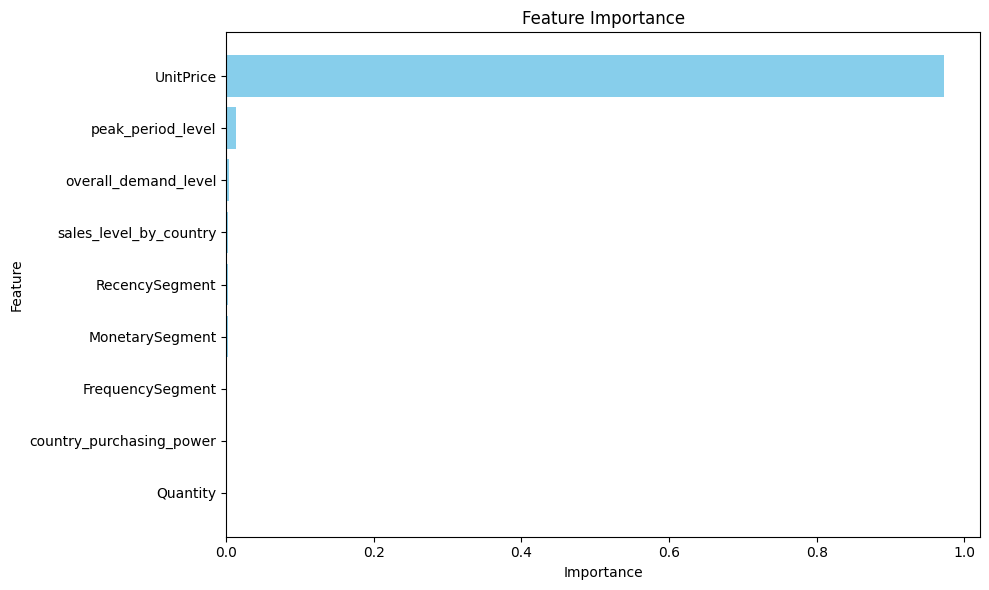

In [77]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [78]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  # 'coerce' converts invalid dates to NaT

# **Check for invalid dates**
invalid_dates = df[pd.isna(df['InvoiceDate'])]  # Find rows where InvoiceDate is NaT (invalid)

# Display the result
print("\nInvalid dates in 'InvoiceDate' column:")
print(invalid_dates)


Invalid dates in 'InvoiceDate' column:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, hour, weekday, month, week, total_sales, peak_period_level, overall_demand_level, RecencySegment, FrequencySegment, MonetarySegment, country_purchasing_power, sales_level_by_country, adjusted_unit_price]
Index: []

[0 rows x 21 columns]


In [79]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'hour', 'weekday', 'month',
       'week', 'total_sales', 'peak_period_level', 'overall_demand_level',
       'RecencySegment', 'FrequencySegment', 'MonetarySegment',
       'country_purchasing_power', 'sales_level_by_country',
       'adjusted_unit_price'],
      dtype='object')

In [80]:
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Training MSE: 0.013665524874277872
Test MSE: 0.0030793020892575444
Training R^2: 0.9878595527313326
Test R^2: 0.9938107057746731


In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -scores.mean()
print(f"Mean CV MSE: {mean_cv_mse}")

Mean CV MSE: 0.1011763403321615


In [82]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']